<a href="https://colab.research.google.com/github/VVdovichev/Data_analysis_algorithms/blob/main/Lesson_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

__1.__ К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [88]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

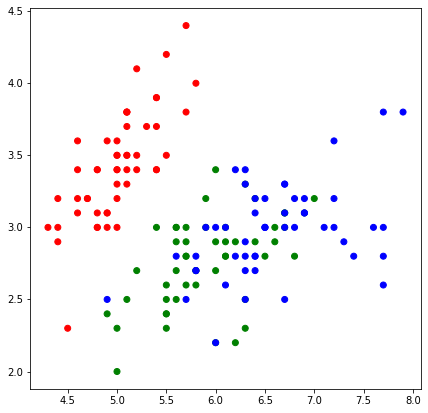

In [90]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [93]:
def knn(x_train, y_train, x_test, k, q=0.5):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += np.power(q, d[0])    #changed

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [94]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [95]:
for i in range(1, 11):
  y_pred = knn(X_train, y_train, X_test, i)
  print(f'Точность алгоритма при k = {i}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.700
Точность алгоритма при k = 2: 0.700
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 4: 0.700
Точность алгоритма при k = 5: 0.733
Точность алгоритма при k = 6: 0.700
Точность алгоритма при k = 7: 0.733
Точность алгоритма при k = 8: 0.733
Точность алгоритма при k = 9: 0.733
Точность алгоритма при k = 10: 0.767


__2.__ *Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [96]:
from sklearn.datasets import make_blobs, make_moons

X, y = make_blobs(n_samples=100, random_state=1)

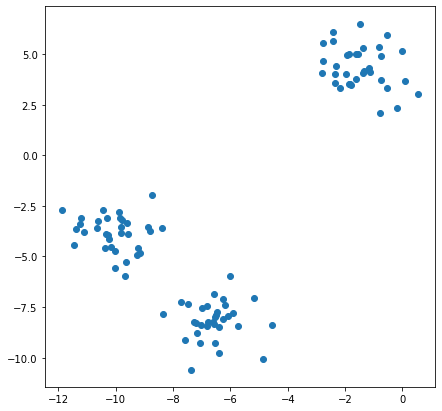

In [97]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

In [98]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для кластеризации
    clusters = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # кластеризуем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            cluster = distances.index(min(distances))
            clusters[cluster].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.linalg.norm(centroids[centroid] - old_centroids[centroid], ord=2) > min_distance:
                optimal = False
                break
        
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, clusters

In [99]:
def visualize(centroids, clusters):
    colors = ['r', 'g', 'b', 'orange', 'y']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for cluster_item in clusters:
        for x in clusters[cluster_item]:
            plt.scatter(x[0], x[1], color=colors[cluster_item])
            
    plt.show()

In [100]:
# определим максимальное количество итераций
max_iterations = 1

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 2

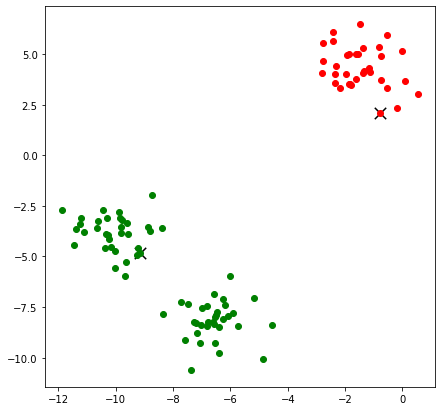

CPU times: user 468 ms, sys: 2.56 ms, total: 471 ms
Wall time: 476 ms


In [101]:
%%time
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [102]:
def mean_squared_intracluster_distance(centroids, clusters):
    distance = 0
    
    for cluster in clusters.keys():
        distance += np.sum(np.power(np.sum(np.power(clusters[cluster] - centroids[cluster], 2), axis=1), 0.5))
    
    return distance / len(clusters)

In [103]:
%%time
iterations = 10
K = np.arange(1, 11, 1)
list_distance = []
for i in K:
  centroids, clusters = kmeans(X, i, iterations, min_distance)
  list_distance.append(mean_squared_intracluster_distance(centroids, clusters))




CPU times: user 530 ms, sys: 379 µs, total: 530 ms
Wall time: 536 ms


Text(0, 0.5, 'mean_squared_intracluster_distance')

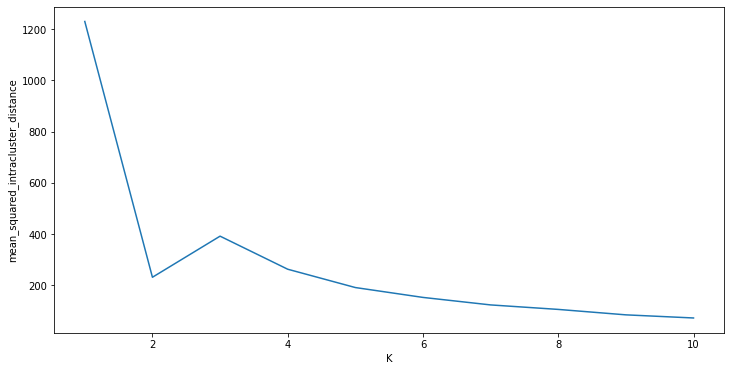

In [105]:
plt.figure(figsize=([12, 6]))

plt.plot(K, list_distance)
plt.xlabel("K")
plt.ylabel("mean_squared_intracluster_distance")